In [1]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## **Data Understanding**

Dataset supermarket adalah data perusahaan ritel yang berisi data frekuensi **platform**(*web,catalog,store*) transaksi dan pendapatan per **lini produknya**(*wines, fruits, meat, fish, sweet, gold*), disertai dengan **data pribadi** konsumennya.

In [3]:
df= pd.read_excel('cleanSuperstore.xlsx')
df

,ID,Year_Birth,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,Frequency,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,5524,1957,Baby Boomer,Graduation,Single,58138.0,0,0,2012-09-04,58,...,4,22,7,0,0,0,0,0,1,0
1,2174,1954,Baby Boomer,Graduation,Single,46344.0,1,1,2014-03-08,38,...,2,4,5,0,0,0,0,0,0,0
2,4141,1965,Gen X,Graduation,Together,71613.0,0,0,2013-08-21,26,...,10,20,4,0,0,0,0,0,0,0
3,6182,1984,Millennials,Graduation,Together,26646.0,1,0,2014-02-10,26,...,4,6,6,0,0,0,0,0,0,0
4,5324,1981,Millennials,PhD,Together,58293.0,1,0,2014-01-19,94,...,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,9432,1977,Gen X,Graduation,Together,666666.0,1,0,2013-06-02,23,...,3,7,6,0,0,0,0,0,0,0
2018,10870,1967,Gen X,Graduation,Together,61223.0,0,1,2013-06-13,46,...,4,16,5,0,0,0,0,0,0,0
2019,7270,1981,Millennials,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,13,18,6,0,0,0,1,0,0,0
2020,8235,1956,Baby Boomer,Master,Together,69245.0,0,1,2014-01-24,8,...,10,21,3,0,0,0,0,0,0,0


In [27]:
# deep info
stats = []
for column in df.columns:
    dtype = df[column].dtype
    null_count = df[column].isnull().sum()
    null_pct = round((null_count / len(df)) * 100,2)
    unique_count = df[column].nunique()
    unique_sample = df[column].dropna().sample(min(2, unique_count)).tolist()

    stats.append({
        'Kolom Data': column,
        'Tipe Data': dtype,
        'Null': null_count,
        'nullPct(%)': null_pct,
        'unique': unique_count,
        'uniqueSample': unique_sample
    })

pd.DataFrame(stats)

,Kolom Data,Tipe Data,Null,nullPct(%),unique,uniqueSample
0,ID,int64,0,0.0,2022,"[4149, 564]"
1,Year_Birth,int64,0,0.0,56,"[1950, 1983]"
2,Generation,object,0,0.0,4,"[Baby Boomer, Millennials]"
3,Education,object,0,0.0,4,"[Basic, Master]"
4,Marital_Status,object,0,0.0,3,"[Together, Together]"
5,Income,float64,0,0.0,1971,"[22304.0, 40246.0]"
6,Kidhome,int64,0,0.0,3,"[2, 1]"
7,Teenhome,int64,0,0.0,3,"[0, 0]"
8,Dt_Customer,datetime64[ns],0,0.0,663,"[2013-01-02 00:00:00, 2012-11-26 00:00:00]"
9,Recency,int64,0,0.0,100,"[11, 25]"


In [70]:
df.columns

Index(['ID', 'Year_Birth', 'Generation', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Monetary', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'Frequency',
       'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'],
      dtype='object')

In [72]:
dff=df[['ID','Kidhome', 'Teenhome','MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Monetary', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'Frequency']]

In [75]:
#memprediksi kedatangan ke supermarket berdasarkan jumlah anak
pred1= dff[['Kidhome','Teenhome','Frequency']]
pred1.head()

,Kidhome,Teenhome,Frequency
0,0,0,22
1,1,1,4
2,0,0,20
3,1,0,6
4,1,0,14


In [81]:
reg_model = sm.OLS(pred1['Frequency'], sm.add_constant(pred1[['Kidhome','Teenhome']]))
hasil = reg_model.fit()
print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:              Frequency   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     501.7
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.28e-177
Time:                        15:45:18   Log-Likelihood:                -6444.1
No. Observations:                2022   AIC:                         1.289e+04
Df Residuals:                    2019   BIC:                         1.291e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9759      0.211     75.607      0.0

Dari Uji hipotesa yang dilakukan <br>

- Ho : nilai Beta tidak signifikan terhadap dataset
- H1 : nilai Beta signifikan terhadap dataset

In [82]:
def model(x):
    Y = 15.9759 + (-7.6754*x)
    return Y

x=int(input('Masukkan Jumlah anak untuk mengetahui prediksi frekuensi'))

print("Jumlah Anak\tFrekuensi Kedatangan")
print("----------------")
for i in range(x):
    Y = model(x)
    print(f"{i}\t{model(i)}")


Jumlah Anak	Frekuensi Kedatangan
----------------
0	15.9759
1	8.3005
2	0.6250999999999998
3	-7.0503
4	-14.7257


In [62]:
prob_f = hasil.f_pvalue
if prob_f > 0.05:
    print("Tidak ada bukti yang cukup untuk menolak hipotesis nol. Nilai Beta mungkin tidak signifikan terhadap dataset.")
else:
    print("Ada bukti yang cukup untuk menolak hipotesis nol. Nilai Beta Setidaknya satu prediktor signifikan.")

Ada bukti yang cukup untuk menolak hipotesis nol. Nilai Beta Setidaknya satu prediktor signifikan.


In [83]:
#jumlah anak dan remaja dalam rumah terhadap kedatangan ke supermarket
pred2= df[['Kidhome','Teenhome','Monetary']]
pred2.head()

,Kidhome,Teenhome,Monetary
0,0,0,1617
1,1,1,27
2,0,0,776
3,1,0,53
4,1,0,422


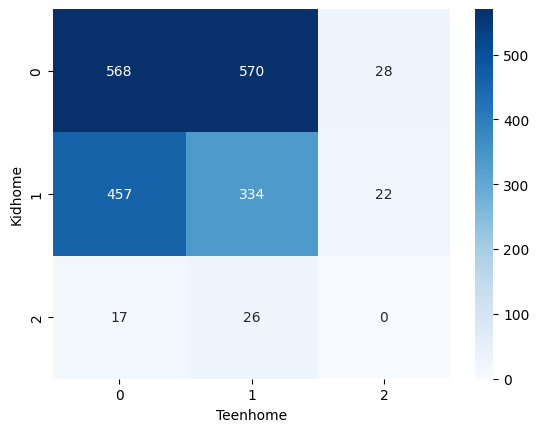

In [23]:
pivot_table = pred2.pivot_table(index='Kidhome', 
                                columns='Teenhome', 
                                values='Monetary', 
                                aggfunc='count', 
                                fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, 
            annot=True, 
            cmap='Blues', 
            fmt='g')

plt.show()

In [52]:
reg_model = sm.OLS(pred2['Monetary'], sm.add_constant(pred2[['Kidhome','Teenhome']]))
hasil = reg_model.fit()
print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:               Monetary   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     528.4
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          2.84e-185
Time:                        15:02:25   Log-Likelihood:                -15385.
No. Observations:                2022   AIC:                         3.078e+04
Df Residuals:                    2019   BIC:                         3.079e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        985.1794     17.586     56.022      0.0

In [87]:
def model(x1,x2):
    Y = 985.1794 + (-637.8138*x1) + (-182.0574*x2)
    return Y

for i in range(x+1):
    for j in range(x+1):
        print(f'dengan jumlah anak {i}, dan remaja {j}, diprediksi konsumen dalam kurun waktu 2 tahun mengeluarkan{model(i,j)}')
        
x=int(input('Masukkan Jumlah anak untuk mengetahui prediksi frekuensi'))

dengan jumlah anak 0, dan remaja 0, diprediksi konsumen dalam kurun waktu 2 tahun mengeluarkan985.1794
dengan jumlah anak 0, dan remaja 1, diprediksi konsumen dalam kurun waktu 2 tahun mengeluarkan803.122
dengan jumlah anak 0, dan remaja 2, diprediksi konsumen dalam kurun waktu 2 tahun mengeluarkan621.0645999999999
dengan jumlah anak 0, dan remaja 3, diprediksi konsumen dalam kurun waktu 2 tahun mengeluarkan439.0072
dengan jumlah anak 1, dan remaja 0, diprediksi konsumen dalam kurun waktu 2 tahun mengeluarkan347.3656
dengan jumlah anak 1, dan remaja 1, diprediksi konsumen dalam kurun waktu 2 tahun mengeluarkan165.30819999999997
dengan jumlah anak 1, dan remaja 2, diprediksi konsumen dalam kurun waktu 2 tahun mengeluarkan-16.74920000000003
dengan jumlah anak 1, dan remaja 3, diprediksi konsumen dalam kurun waktu 2 tahun mengeluarkan-198.8066
dengan jumlah anak 2, dan remaja 0, diprediksi konsumen dalam kurun waktu 2 tahun mengeluarkan-290.44820000000004
dengan jumlah anak 2, dan remaja 